## Lending Case Club Study
Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return.
We have a sample dataset of these borrowers to analyze and get insights from this data.

In [57]:
# libraries to import for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import missingno as msno
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [58]:
# Loading the dataset
loanData = pd.read_csv('loan.csv' , low_memory = False)

In [59]:
# 39717 records(rows) and 111 features(columns)
loanData.shape

(39717, 111)

In [60]:
loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<AxesSubplot:>

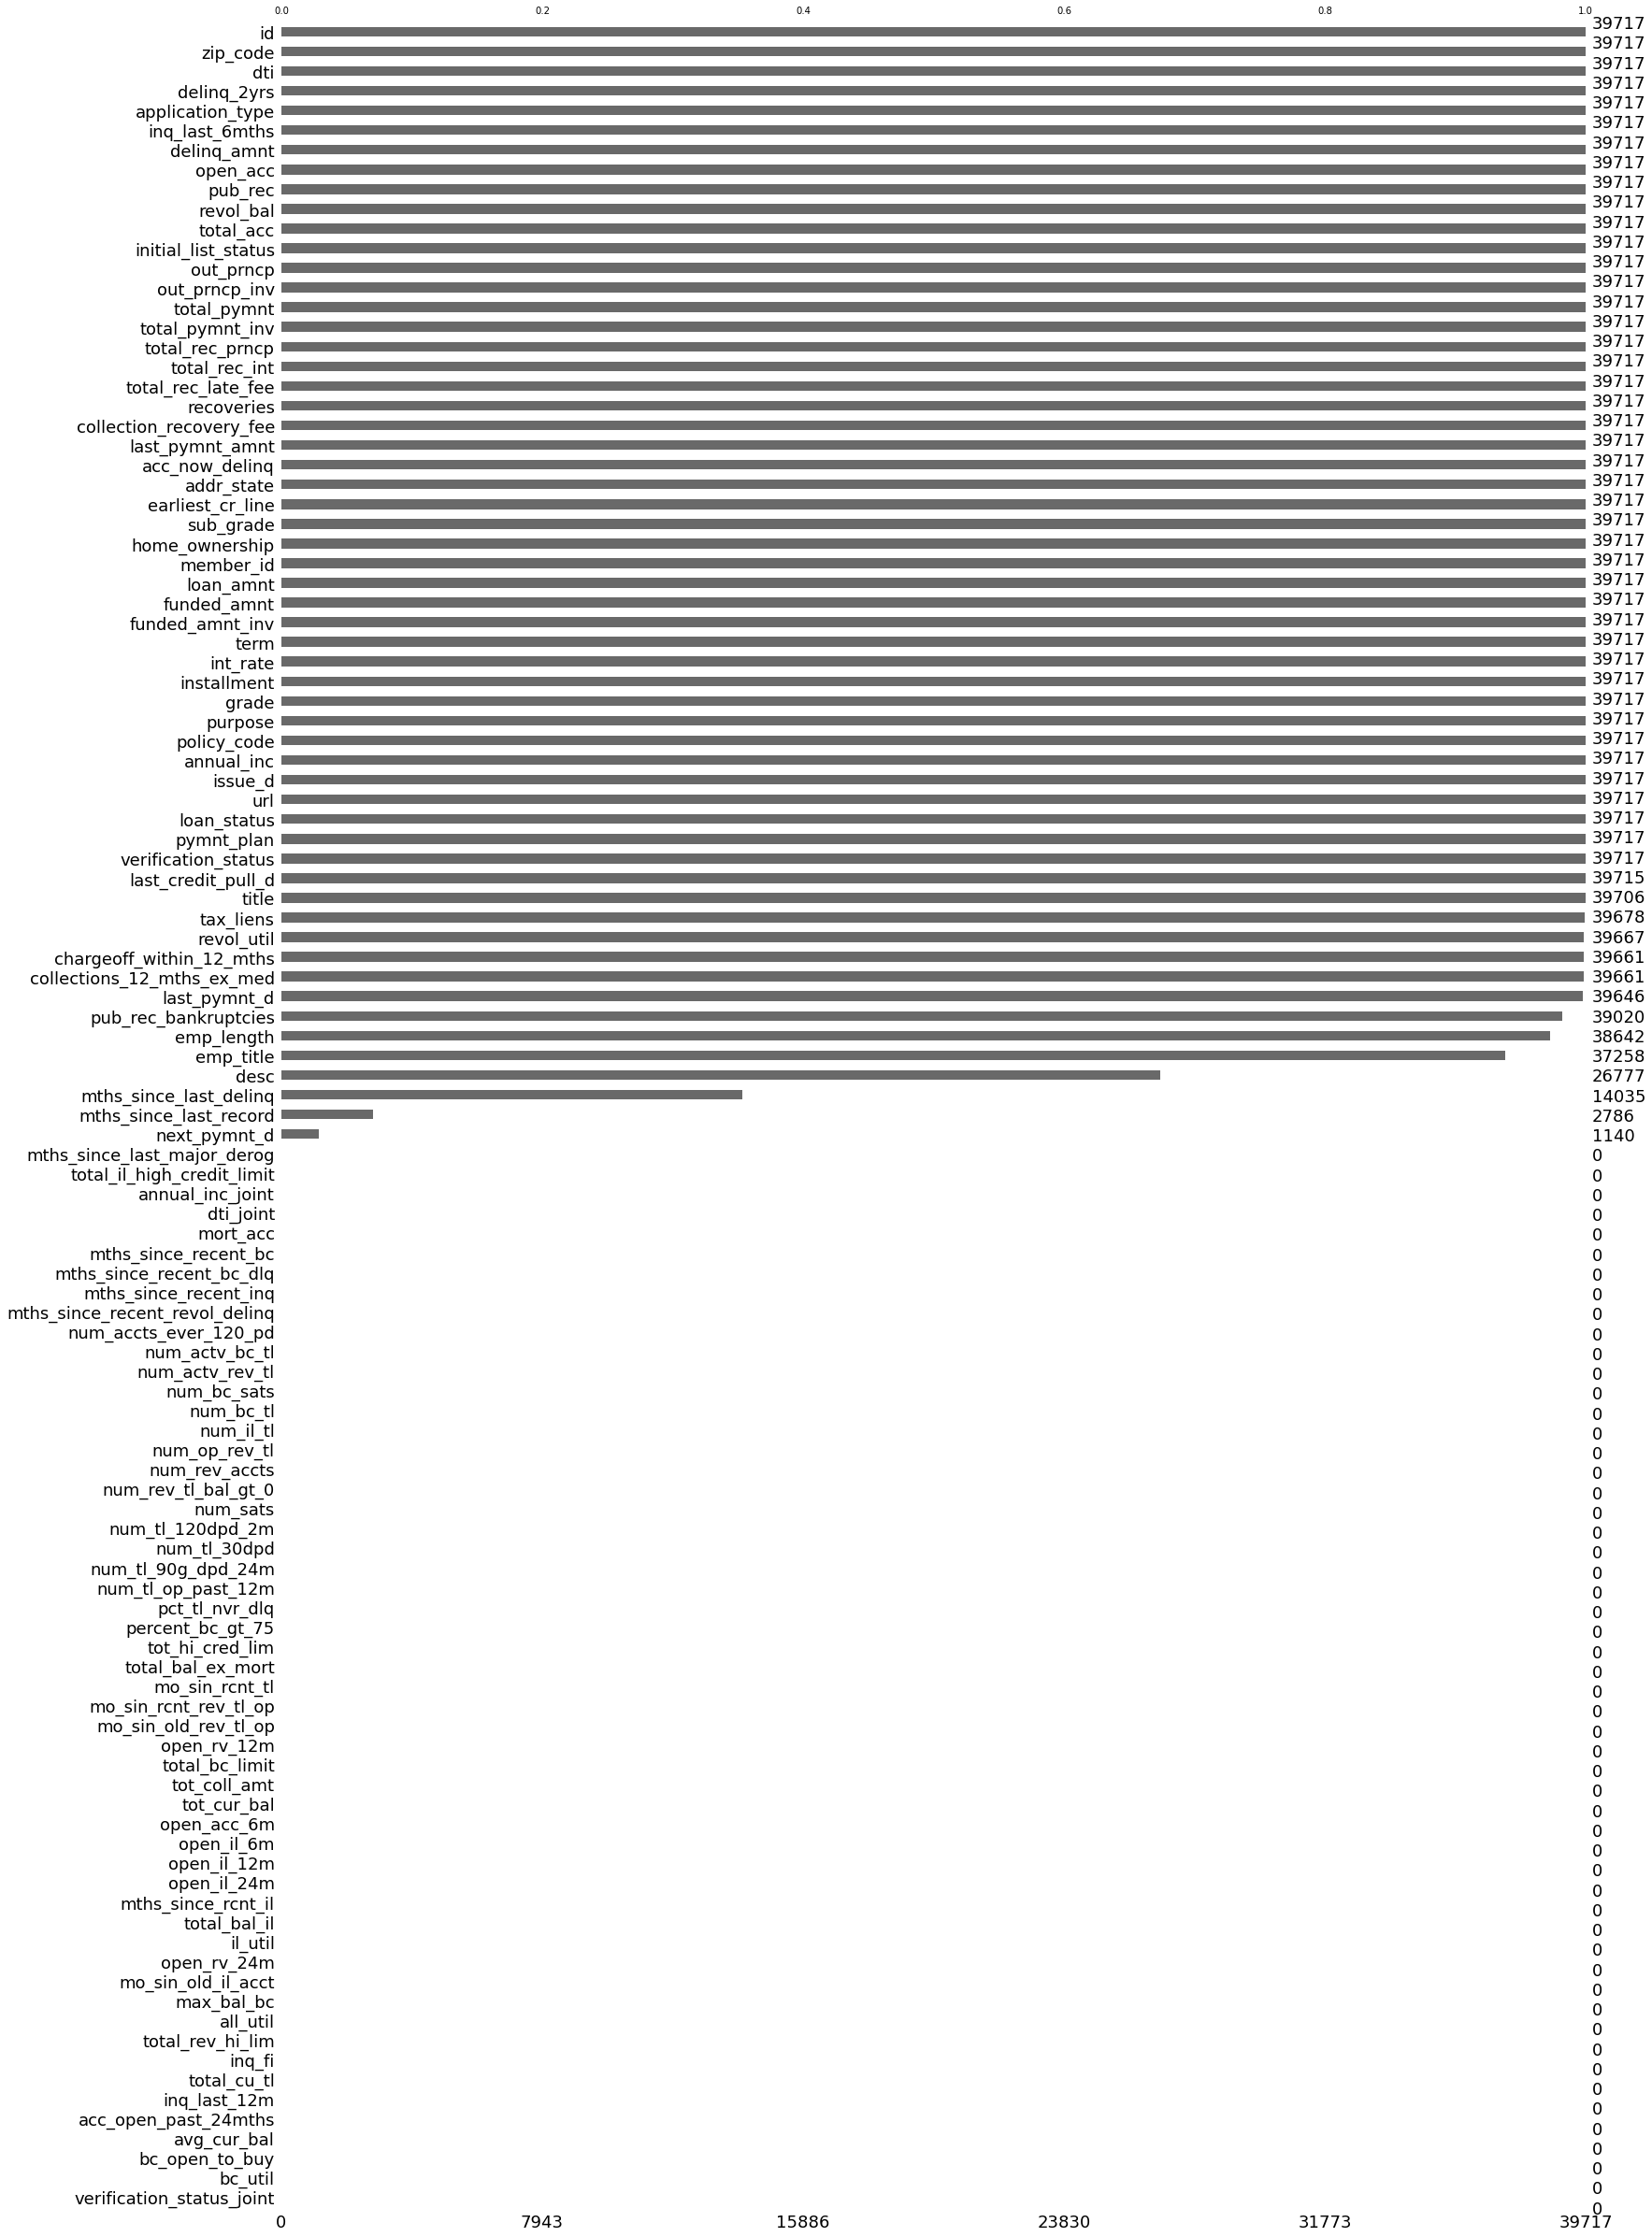

In [69]:
# Visual representation of missing data in all the columns of this dataset
msno.bar(loanData,sort='ascending',fontsize=18)

In the above visualisation, bars represent the number of values in a particular column. Many columns have very low to zero values which wont be useful in EDA and hence we can drop these columns

### Data Cleaning

In [61]:
# columns with all NA values dropped
loanData = loanData.dropna(axis=1 , how='all')
loanData.shape

(39717, 57)

In [62]:
loanData[loanData.duplicated()] # to check whether we have duplicate record in our data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [63]:
len(loanData['member_id'].unique())  #each memeber id is unique in the data

39717

In [64]:
# List of all the columns of this dataset with Missing value percentage
naValues = round(loanData.isna().sum()/len(loanData)*100,2).sort_values(ascending=False)
print('Missing Value Percentage of the columns in Loan Data')
print(naValues)

Missing Value Percentage of the columns in Loan Data
next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
home_ownership                 0.00
int_rate                       0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
total_rec_prncp                0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
collection_recovery_fee        0.00
term                           0.00
last_pymnt_amnt                0.00
initial_lis

In this analysis we will drop all those columns which have a missing value percentage more than 60

In [65]:
loanData = loanData.drop(columns = list(naValues[naValues > 60].keys()))

In [66]:
loanData.shape

(39717, 54)

#### customerBehaviourFeatures is a list of all the variables which are generated after the loan is approved and they are not available with us at the time of loan application so we cannot use them in our analysis for loan approvals 

In [67]:
customerBehaviourFeatures = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']

In [68]:
loanData = loanData.drop(columns = customerBehaviourFeatures)  #dropped customerBehaviourFeatures

In [69]:
loanData.columns # features in our loandata

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [70]:
# How manu unique values a particular column has
uniqueValues = loanData.nunique()
uniqueValues

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
initial_list_status               1
collections_12_mths_ex_med        1
policy_code                 

uniqueValues shows unique values in each column of our dataset. Now if we observe there are columns with only 1 unique value throughout which will not be useful for this analysis hence we will drop such columns.

In [71]:
loanData = loanData.drop(columns = uniqueValues[uniqueValues.values == 1].keys()) #dropped all those columns with 1 unique value

In [72]:
loanData.shape

(39717, 25)

In [73]:
#these are few more columns which we will drop from data as they will not contribute to the analysis
loanData = loanData.drop(columns = ['url' ,'zip_code' , 'member_id','desc']) 

In [74]:
loanData.shape

(39717, 21)

Employment Title (emp_title) , Employment Duration (emp_length) , Job Title (title) & Bankruptcies (pub_rec_bankruptcies) have missing values in the data as shown below with the count of missing values

In [75]:
loanData.isna().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

* As we can see 4 columns have missing values. For numerical columns we usually use mean imputation or if there are outliers we use median imputation.For categorical columns we can use mode imputation and remove the missingness.
* Here we will continue without imputation or removing the rows and keep the dataset as it is.

In [76]:
# checking for rows(records) having equal to or more than 5 NA values throughtout
loanData[loanData.isna().sum(axis=1) >= 5]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies


In [77]:
# term column had extra whitespaces on the left which we have removed using lstrip(left strip)
loanData['term'] = loanData['term'].str.lstrip(' ')

### Typecasting

In [78]:
loanData.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [79]:
# we have removed the percentage sign(%) from the interest rate column to make it numeric and useful for our visualization
loanData['int_rate'] = loanData['int_rate'].str.rstrip('%')
loanData['int_rate'] = loanData['int_rate'].apply(pd.to_numeric)

In [80]:
# converted issue_d column to datetime to month-year format to extract month and year seperately for our analysis
loanData['issue_d'] = pd.to_datetime(loanData['issue_d'] , format = '%b-%y')

In [81]:
loanData['term'] = loanData['term'].astype(str)
loanData['title'] = loanData['title'].apply(str)

### Outlier Detection
* An outlier is an object that deviates significantly from the rest of the objects. They can be caused by measurement or execution error. The analysis of outlier data is referred to as Outlier analysis or Outlier detection
* Boxplots are really good at spotting outliers in the provided data. The most commonly implemented method to spot outliers with boxplots is the 1.5 x IQR rule.
* Any data point smaller than Q1 – 1.5xIQR and any data point greater than Q3 + 1.5xIQR is considered as an outlier where Q1 is 1st Quartile(25%) and Q3 is the 3rd Quartile(75%)

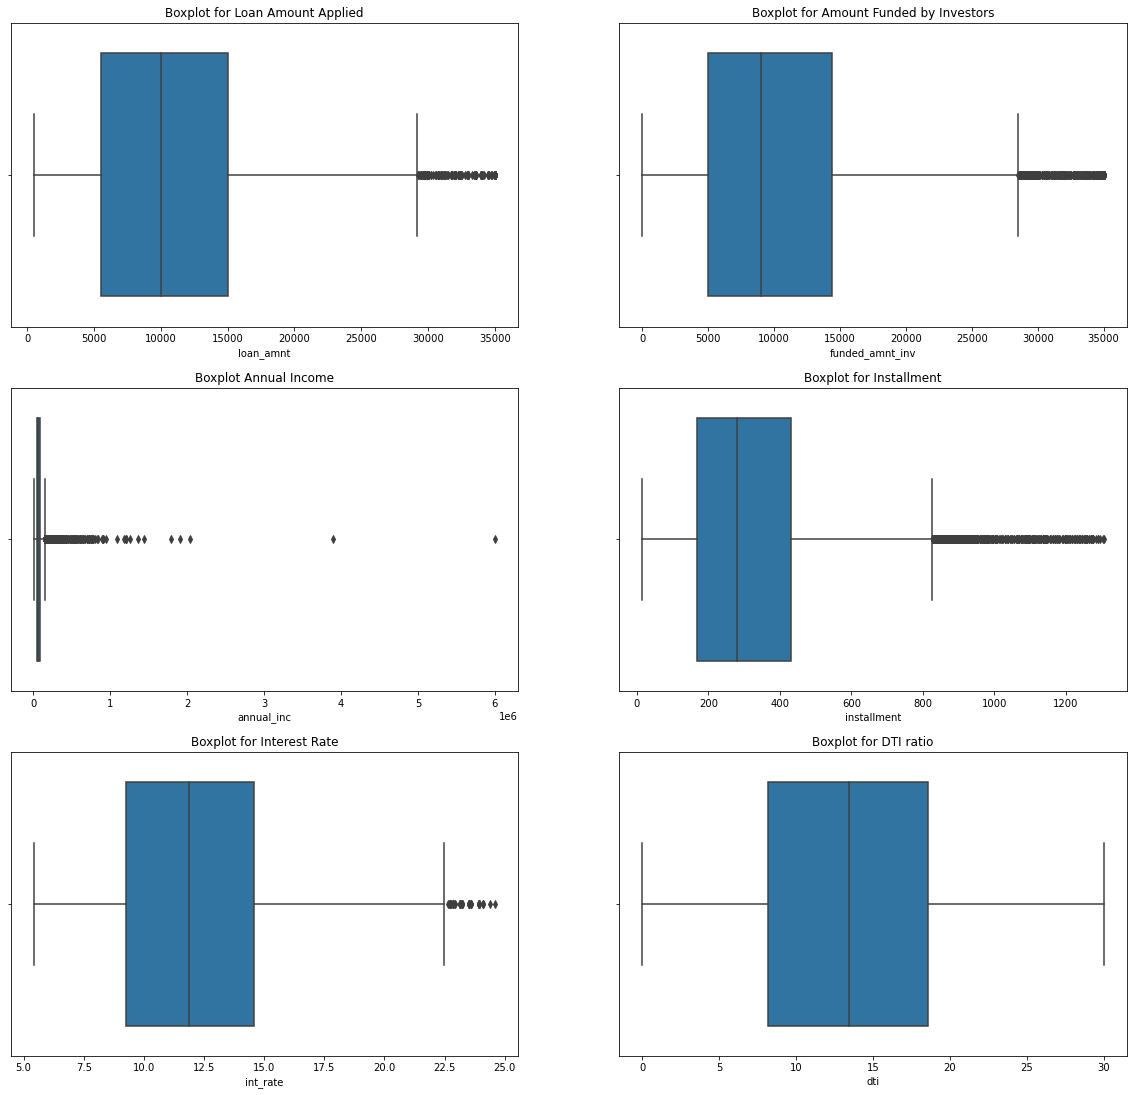

In [82]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2 , figsize=(20,19))
sns.boxplot(loanData['loan_amnt'],ax=ax1)
ax1.set_title('Boxplot for Loan Amount Applied')
sns.boxplot(loanData['funded_amnt_inv'],ax=ax2)
ax2.set_title('Boxplot for Amount Funded by Investors')
sns.boxplot(loanData['annual_inc'],ax=ax3)
ax3.set_title('Boxplot Annual Income')
sns.boxplot(loanData['installment'],ax=ax4)
ax4.set_title('Boxplot for Installment')
sns.boxplot(loanData['int_rate'],ax=ax5)
ax5.set_title('Boxplot for Interest Rate')
sns.boxplot(loanData['dti'],ax=ax6)
ax6.set_title('Boxplot for DTI ratio')
plt.show()

* If we look at the Distribution of the data through boxplots apart from DTI all other features have outliers present. Annual Income has most number of outliers because of income is something which is very diverse.
* To remove these outliers we can try different transformations such as log, exp etc or we can use quantile method and set some threshold percentile eg 0.95(95 percentile) and see if outliers are removed.
* In this study as we are just doing EDA so we will not remove them and keep them and do the analysis.

### Derived Metrics
Extracting information and creating new columns in the dataset

In [83]:
# created an issued month column
loanData['issue_month'] = loanData['issue_d'].dt.month

In [84]:
# created an issue year column
loanData['issue_year'] = loanData['issue_d'].dt.year

In [85]:
# as we have created two new columns we can dop the issue_d column now
loanData = loanData.drop(columns = ['issue_d'])

In [86]:
# unique state abbreviations which we have in addr_state column
loanData['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

* We have made lists of regions by state. There are 5 regions in the US

In [87]:
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

In [88]:
loanData['region'] = np.nan  # created a new column which will store region for that particular state

In [89]:
#User defined function to map the regions to their respective states
def region(area):
    if area in west:
        return 'West'
    elif area in south_west:
        return 'South West'
    elif area in south_east:
        return 'South East'
    elif area in mid_west:
        return 'Mid West'
    else:
        return 'North East'

In [90]:
loanData['region'] = loanData['addr_state'].apply(region) #applying the region function to the addr_state column

In [91]:
# created a new column for annual income category(Low,Medium,High and Very High) using the annual_inc column to map
loanData['annualIncomeCategory'] = np.nan 

In [92]:
#User defined function to map annual income to annual income category
def annualIncCategory(x):
    if x <= 100000:
        return 'Low'
    elif (x > 100000) & (x <=200000):
        return 'Medium'
    elif (x > 200000) & (x <=300000):
        return 'High'
    elif (x > 300000):
        return 'Very High'

In [93]:
#applying the annualIncCategory function to the annual_inc column
loanData['annualIncomeCategory'] = loanData['annual_inc'].apply(annualIncCategory)

* Low income category: Borrowers that have an annual income lower or equal to 100,000 usd.
* Medium income category: Borrowers that have an annual income higher than 100,000 usd but lower or equal to 200,000 usd.
* High income category: Borrowers that have an annual income higher than 200,000 usd but lower or equal to 300,000 usd.
* Very High income category: Borrowers that have an annual income higher than 300,000 usd

In [94]:
loanData['dtiBins'] = pd.cut(loanData['dti'] , bins=6,precision=0 , labels=['0-5%','5%-10%','10%-15%','15%-20%','20%-25%','25%-30%'])

* dti stands for Debt-to-Income Ratio
* If DTI ratio is below 36%, it’s a pretty good indicator that you’re able to take on and manage new debt responsibly. If your DTI is over 43%—and particularly if it’s over 50%—you’ll likely need to pay down some debt or find other sources of income before lenders will approve you for a mortgage or personal loan.
* we have dti column and we have created 6 buckets with 5% interval which ranges from 0 to 30% as there are no dti ratio above 30% in this dataset.

In [95]:
loanData['loanAmountBins'] = pd.cut(loanData['loan_amnt'] , bins=7,precision = 0 , labels = ['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

* Loan Amount is the amount applied by the borrower. We have created 7 buckets for loan_amnt column for easy visualization

In [96]:
loanData['fundedAmountInvBins'] = pd.cut(loanData['funded_amnt_inv'] , bins=7,precision = 0, labels = ['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'] )

* funded_amnt_inv column is the Amount funded by the investor to a borrower. It isnt neccesary that the Loan Amount which is being asked is same to the funded amount by the investor. 
* We have created 7 buckets for funded_amnt_inv column for easy visualization

### Data Analysis

In [40]:
# stop word is a commonly used words such as 'the','is' usually they are function words which help as a connector in a sentence
stopwords = set(STOPWORDS)

In [41]:
# Though title column has missing values but in general we can see words which were used the most
loanTitle = ' '.join(loanData['title'])

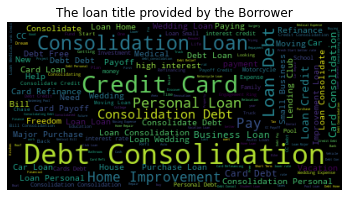

In [46]:
wordcloud = WordCloud(stopwords = stopwords).generate(loanTitle)
# Generate plot
plt.imshow(wordcloud)
plt.title('The loan title provided by the Borrower')
plt.axis("off")
plt.show()

#### Word cloud is a visual representation of textual data, larger the word in the visual more commonly it was used in the data.
* As here we can see 'Debt Consolidation' , 'Credit Card' , 'Consolidation Loan' ,'Loan Debt' are among few most commonly used loan title

#### Univariate Analysis of variables in the dataset

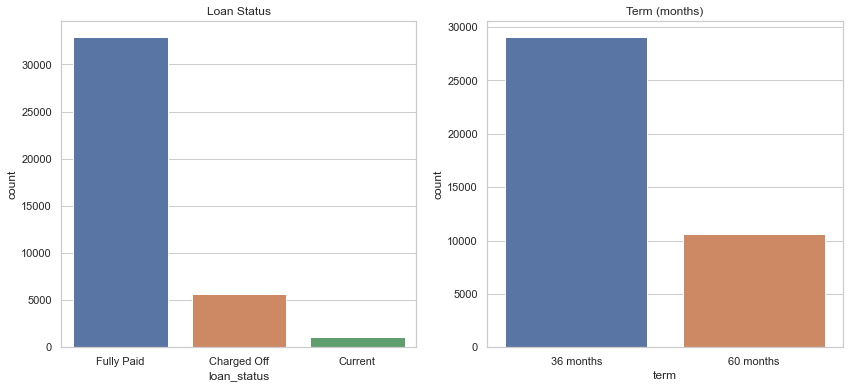

In [112]:
fig , ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2 , figsize=(14,6))
sns.set_theme(style = 'whitegrid')
sns.countplot(x='loan_status' , data=loanData , ax=ax1)
ax1.set_title('Loan Status')
sns.countplot(x='term' , data=loanData , ax=ax2)
ax2.set_title('Term (months)')
plt.show()

* 1st visual tells us about the Loan Status by count in the dataset with 3 unique values 'Fully Paid' , 'Charged Off' and 'Current' . 
* 2nd visual tells us that a borrower usually prefer 36 months of term to repay a loan than 60 months

In [97]:
#Current loan status will not be useful in our study and hence we are dropping this column
loanData = loanData[loanData['loan_status']!='Current']

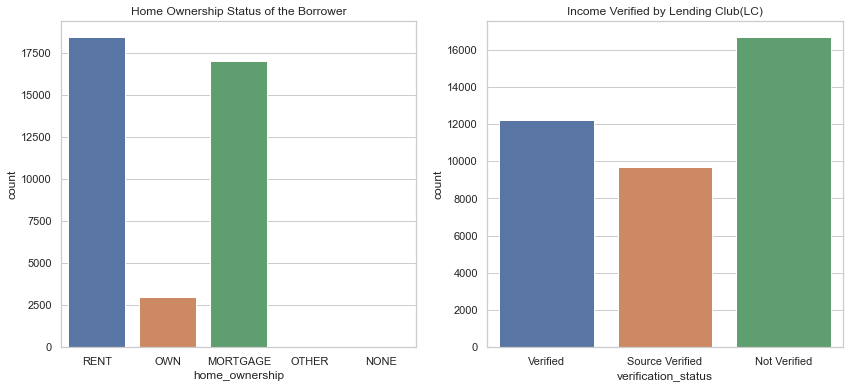

In [115]:
fig , ((ax1,ax2)) = plt.subplots(nrows=1 , ncols=2 ,figsize=(14,6))
sns.countplot(x='home_ownership' , data = loanData , ax=ax1)
ax1.set_title('Home Ownership Status of the Borrower')
sns.countplot(x='verification_status' , data = loanData,ax=ax2)
ax2.set_title('Income Verified by Lending Club(LC)')
plt.show()

* 1st Visual tells us the home ownership count of the Borrowers. Rent and followed by Mortgage status has the most number of counts for Fully Paid and Charged Off loans

* 2nd Visual tells us whether the income is Verfied or not while approving a Loan. As we can see Not verfied has the most count follwed by Verified and then Source Verified count. In later visuals we will also check how much of these 3 verification status contirbutes to Borrowers with 'Charged Off' loan status.

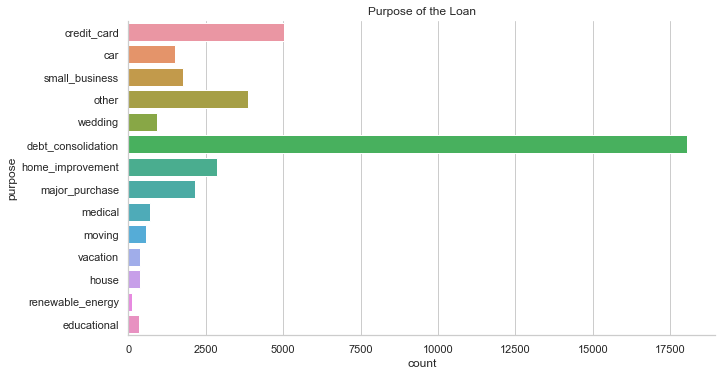

In [117]:
sns.catplot(y='purpose' , data=loanData , kind='count',aspect=2)
plt.title('Purpose of the Loan')
plt.show()

* This Visual above is for the Purpose of the Loan with respect to count. As we can see maximum number of loans are under 'debt consolidation' purpose and then followed by 'credit card'. We can also check which purpose among them has the highest proportion of charged off loans to get better insight

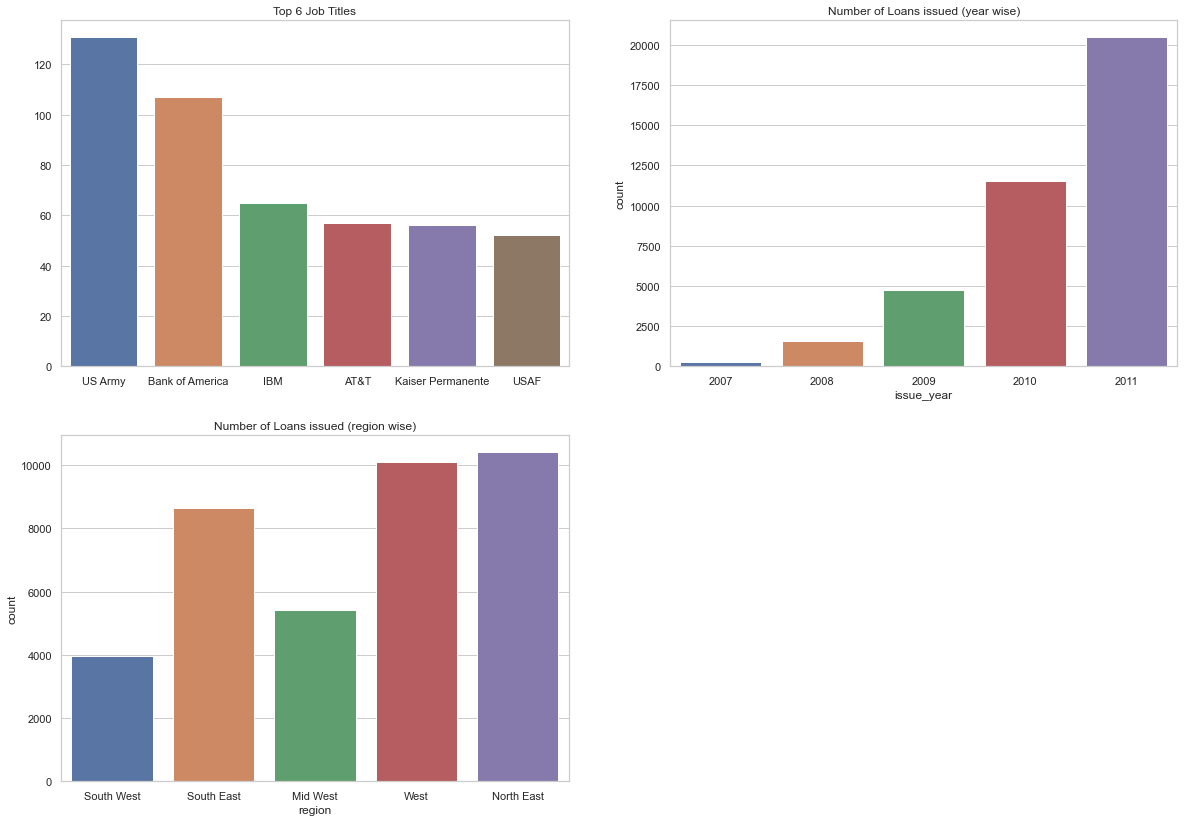

In [118]:
title = loanData['emp_title'].value_counts()
title = title[:6]
fig , ((ax1,ax2) , (ax3,ax4)) = plt.subplots(nrows=2 , ncols=2 ,figsize=(20,14))
sns.barplot(title.index , title.values , ax=ax1)
ax1.set_title('Top 6 Job Titles')
sns.countplot(x='issue_year' , data=loanData , ax=ax2)
ax2.set_title('Number of Loans issued (year wise)')
sns.countplot(x = 'region', data=loanData , ax=ax3)
ax3.set_title('Number of Loans issued (region wise)')
ax4.set_axis_off()
plt.show()

* 1st Visual tells us about the top 6 Job titles(w.r.t count) of the Borrowers which took a loan and there loan status is either 'Fully Paid' or 'Charged Off'. We can see people from 'US Army' have the most number of loans followed by Bank of America employees and then IBM , AT&T, Kaiser and Wells Fargo.

* 2nd Visual which is Number of Loans issued year wise gives us an insight of the count which is increasing year after year from 2007 to 2011.

* 3rd Visual is Number of loans issued region wise which tells us that loan (Fully paid & Charged off) count for North-East region is maximum followed by West, South East, Mid West and South West regions.


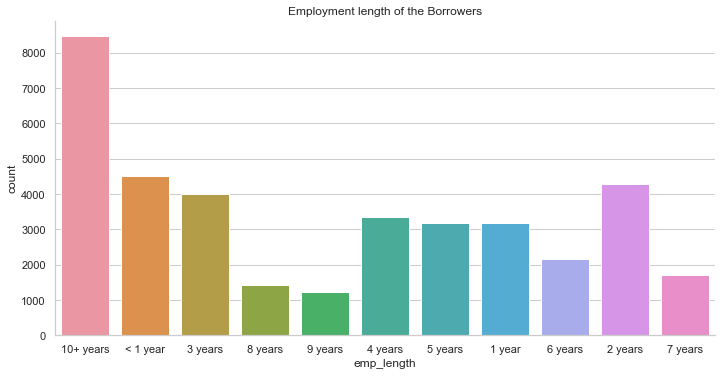

In [119]:
sns.catplot(x='emp_length' , data=loanData , kind='count' , aspect =2)
plt.title('Employment length of the Borrowers')
plt.show()

* This Visual gives us an insight of Employment length(Duration) of the Borrowers(count). Most number of loans(Fully Paid & Charged Off) belongs to employees with 10+ years of experience followed by employees with less than 1 year and 2 years of experience which is an interesting insight.

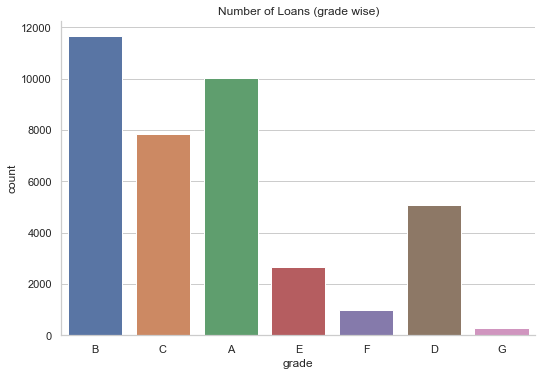

In [120]:
sns.catplot(x = 'grade' , data = loanData , kind='count',aspect=1.5)
plt.title('Number of Loans (grade wise)')
plt.show()

* This Visual gives us an insight on loans with respect to their grade. Credit score has different grades according to their transactional history. Here we can see Grade B has been given maximum number of loans followed by A,C,D,E,F and G

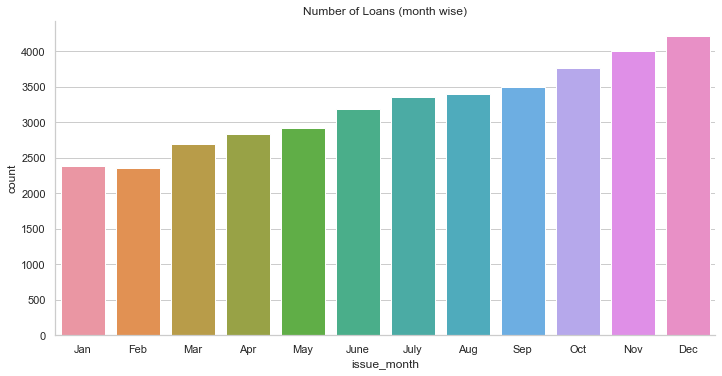

In [121]:
sns.catplot(x='issue_month',data=loanData , kind='count',aspect=2)
plt.title('Number of Loans (month wise)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11] , ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.show()

* Number of loans month wise gives us an insight that it gradually increases from January to December. So during the end months of a year maximum number of loans are given. 

In [122]:
loanData.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies,issue_month,issue_year
count,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,37880.000000,38577.000000,38577.000000
mean,6.763787e+05,11047.025430,10784.058506,10222.481123,11.932219,322.466318,6.877797e+04,13.272727,0.043479,7.114757,2010.309070
std,2.092639e+05,7348.441646,7090.306027,7022.720644,3.691327,208.639215,6.421868e+04,6.673044,0.204583,3.408523,0.882658
min,5.473400e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,1.000000,2007.000000
25%,5.120330e+05,5300.000000,5200.000000,5000.000000,8.940000,165.740000,4.000000e+04,8.130000,0.000000,4.000000,2010.000000
50%,6.564230e+05,9600.000000,9550.000000,8733.440000,11.710000,277.860000,5.886800e+04,13.370000,0.000000,7.000000,2011.000000
75%,8.291460e+05,15000.000000,15000.000000,14000.000000,14.380000,425.550000,8.200000e+04,18.560000,0.000000,10.000000,2011.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,2.000000,12.000000,2011.000000


* The table above gives us details of all the numerical columns in the dataset and  displays summary statistics for a dataframe
It displays count, mean(average), standard deviation, minimum and maximum value present in that column and percentiles(25%,50% & 75%) which is 1st quartile(Q1),meadian(50%) and 3rd quartile(Q3) so this insight can also help us to understand the spread of the data.

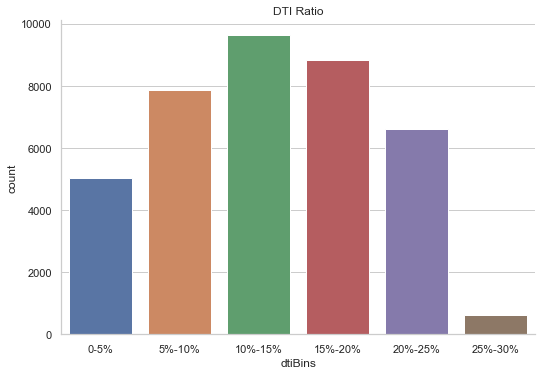

In [123]:
sns.catplot(x='dtiBins' , data=loanData , aspect=1.5 , kind='count' )
plt.title('DTI Ratio')
plt.show()

* This visual gives us an insight that borrowers having a DTI Ratio between 10-15% has maximum number of loans under them. Least being 25-30%.

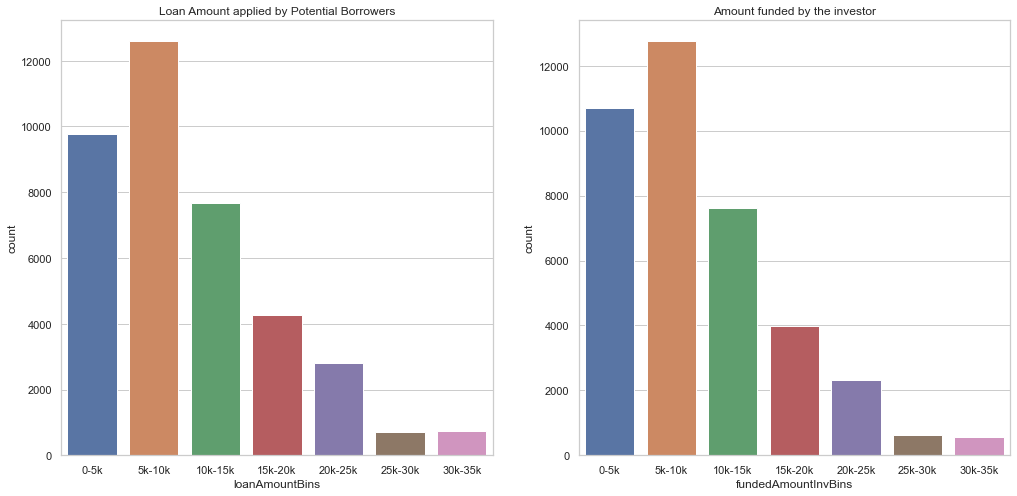

In [124]:
fig,((ax1,ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(17,8))
sns.countplot(x='loanAmountBins' , data=loanData,ax=ax1)
ax1.set_title('Loan Amount applied by Potential Borrowers')
sns.countplot(x='fundedAmountInvBins' , data = loanData,ax=ax2)
ax2.set_title('Amount funded by the investor')
plt.show()

* 1st Visual tells us about the Loan amount applied by the borrowers and we can see that count of maximum amount was between 5k-10k then followed by 0-5k range and so on.
* 2nd Visual shows us the Amount funded by the investor to the borrower and here as well maximum lie between 5k-10k range.
* Now if we look closely at these visuals we can see that loan amount in 0-5k bar increases in the funded amount by investor graph, which means the borrower applied for a bigger Loan amount but got an amount in the 0-5k range lower to what applied.Similary, in 15k-20k and 20k-25k range Loan(Fully Paid & Charged Off) was applied by the borrowers but received an amount lower to it which we can see in Amount funded by the investors graph.

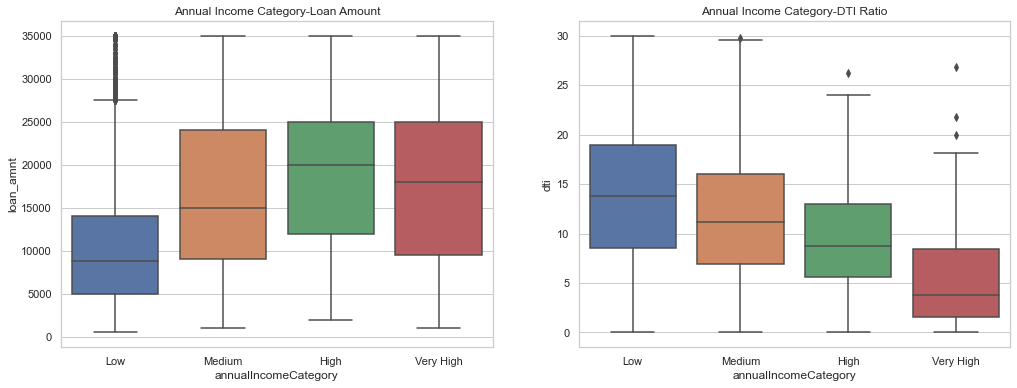

In [125]:
fig,((ax1,ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(17,6))
sns.boxplot(x='annualIncomeCategory' , y ='loan_amnt' , data=loanData , ax=ax1)
ax1.set_title('Annual Income Category-Loan Amount')
sns.boxplot(x='annualIncomeCategory' , y ='dti' , data=loanData,ax=ax2)
ax2.set_title('Annual Income Category-DTI Ratio')
plt.show()

* 1st Visual is the annual income category with respect to loan amount Borrower applied for. We can see outliers for the borrowers with Low Income which means loan they applied for was not in the usual range. Borrowers that made part of the high income category took higher loan amounts than people from low and medium income categories. Of course, people with higher annual incomes are more likely to pay loans with a higher amount.
* 2nd Visual is the annual income category with DTI ratio. As the income is increasing from Low to Very High the DTI ratio is decreasing which mean good credit score.

### Charged Off Loan Proportion  (Loan Status vs Categorical Features)

In [104]:
purpose_loan = loanData.groupby(by=['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_loan['Total'] = purpose_loan['Charged Off'] + purpose_loan['Fully Paid']
purpose_loan['chargedOffProportion'] = purpose_loan['Charged Off'] / purpose_loan["Total"] *100
purpose_loan.sort_values('chargedOffProportion' , ascending=False).style.set_precision(2).background_gradient('PuBuGn')

loan_status,purpose,Charged Off,Fully Paid,Total,chargedOffProportion
11,small_business,475,1279,1754,27.08
10,renewable_energy,19,83,102,18.63
3,educational,56,269,325,17.23
9,other,633,3232,3865,16.38
5,house,59,308,367,16.08
8,moving,92,484,576,15.97
7,medical,106,575,681,15.57
2,debt_consolidation,2767,15288,18055,15.33
12,vacation,53,322,375,14.13
4,home_improvement,347,2528,2875,12.07


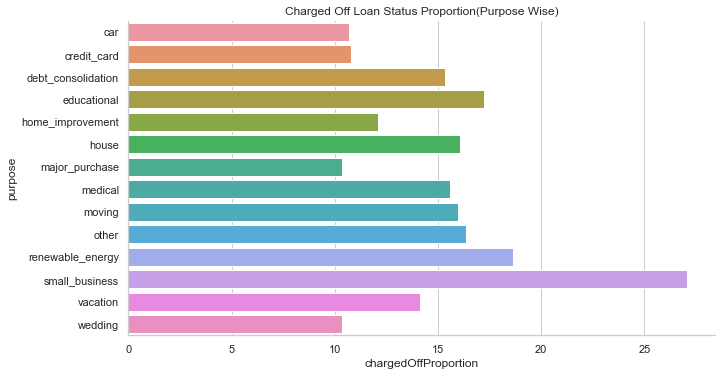

In [128]:
sns.catplot(y ='purpose', x='chargedOffProportion' , data =purpose_loan , kind='bar',aspect=2)
plt.title('Charged Off Loan Status Proportion(Purpose Wise)')
plt.show()

* This Visual gives us an insight of the Charged Off Proportion with respect to the purpose of the loan. Small Business is the one which has highest default percentage (27.08%) in this group. 

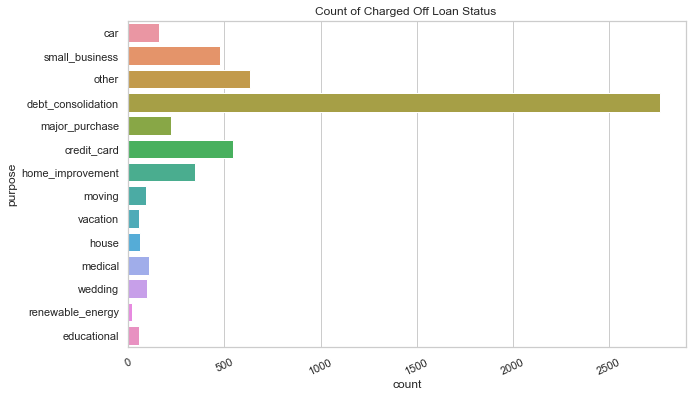

In [129]:
plt.figure(figsize=(10,6))
sns.countplot(y='purpose', data=loanData[loanData['loan_status']=='Charged Off'])
plt.title('Count of Charged Off Loan Status ')
plt.xticks(rotation=25)
plt.show()

* This Visual tells us that though the proportion of Charged Off Loan's is maximum in small business category but the number of cases which Defaulted are maximum in Debt consolidation category

In [105]:
gradeLoanStatus = loanData.groupby(by=['grade','loan_status']).loan_status.count().unstack().reset_index()
gradeLoanStatus['Total'] = gradeLoanStatus['Charged Off'] + gradeLoanStatus['Fully Paid']
gradeLoanStatus['chargedOffProportion'] = gradeLoanStatus['Charged Off']/gradeLoanStatus['Total'] * 100
gradeLoanStatus.sort_values('chargedOffProportion' , ascending=False).style.set_precision(2).background_gradient('PuBuGn')

loan_status,grade,Charged Off,Fully Paid,Total,chargedOffProportion
6,G,101,198,299,33.78
5,F,319,657,976,32.68
4,E,715,1948,2663,26.85
3,D,1118,3967,5085,21.99
2,C,1347,6487,7834,17.19
1,B,1425,10250,11675,12.21
0,A,602,9443,10045,5.99


* Credit scores are important metrics for assesing the overall level of risk
* Lower the grade, higher is the interest the customer had to pay back to investors.
* Lending Club’s interest rates take into account credit risk and market conditions. The final interest rate for each loan grade is the result of the following equation: (Lending Club Base Rate + Adjustment for Risk & Volatility) The base rate remains the same but for with Grade the risk & interest increases.

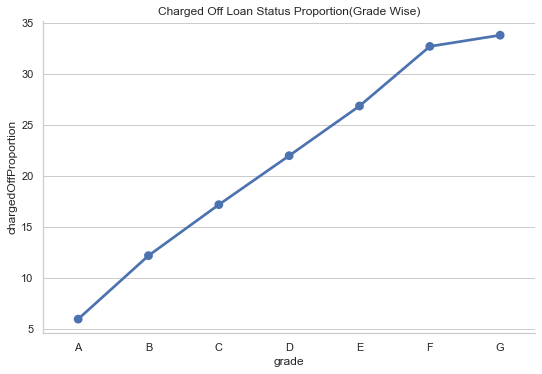

In [131]:
sns.catplot(x='grade' , y = 'chargedOffProportion',data=gradeLoanStatus, aspect=1.5 , kind='point')
plt.title('Charged Off Loan Status Proportion(Grade Wise)')
plt.show()

* This Visual gives us an insight of the charged off proportion for each Grade. Grade G(33.7%) and F(32.6%) were more likely to default on the loan.

In [107]:
subGradeLoanStatus = loanData.groupby(by=['sub_grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
subGradeLoanStatus['Total'] = subGradeLoanStatus['Charged Off'] + subGradeLoanStatus['Fully Paid']
subGradeLoanStatus['chargedOffProportion'] = subGradeLoanStatus['Charged Off']/subGradeLoanStatus['Total'] * 100
subGradeLoanStatus.sort_values('chargedOffProportion',ascending=False).style.set_precision(2).background_gradient('PuBuGn')

loan_status,sub_grade,Charged Off,Fully Paid,Total,chargedOffProportion
29,F5,54,59,113,47.79
32,G3,19,26,45,42.22
31,G2,28,49,77,36.36
28,F4,53,98,151,35.10
34,G5,10,19,29,34.48
30,G1,31,63,94,32.98
26,F2,70,163,233,30.04
25,F1,91,214,305,29.84
23,E4,126,298,424,29.72
27,F3,51,123,174,29.31


* We have 7 Grades (A,B,C,D,E,F & G) to analysis Borrowers and within these Grades their are Sub-Grades. Each of these Grades have 5 sub grades within them and risk & interest within these sub grades also vary and increases as the Grade moves from A1 to G5.

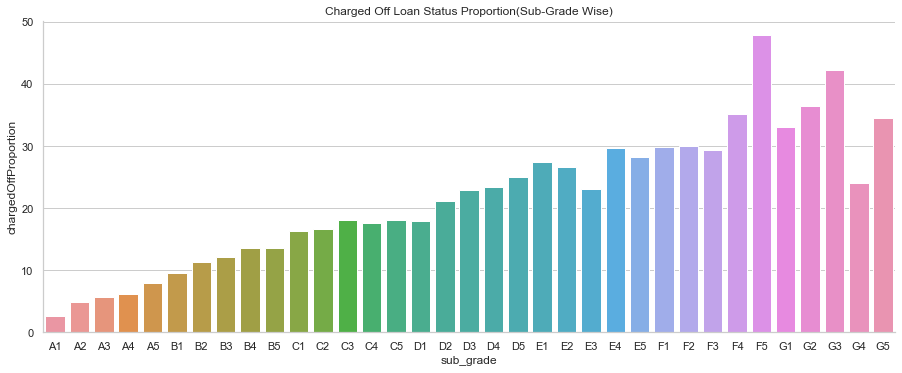

In [133]:
sns.catplot(x='sub_grade' , y = 'chargedOffProportion',data=subGradeLoanStatus, aspect=2.5 , kind='bar')
plt.title('Charged Off Loan Status Proportion(Sub-Grade Wise)')
plt.show()

* So we know that G & F Grades are the ones which Default the maximum now further going into the sub grades we found out that within F Grade, F5(47.7%) sub grade is the one which is more likely to Default then any other followed by G3(42.2%) subgrade

In [108]:
regionLoanStatus = loanData.groupby(by=['region','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
regionLoanStatus['Total'] = regionLoanStatus['Charged Off'] + regionLoanStatus['Fully Paid']
regionLoanStatus['chargedOffProportion'] = regionLoanStatus['Charged Off']/regionLoanStatus['Total'] * 100
regionLoanStatus.sort_values('chargedOffProportion',ascending=False).style.set_precision(2).background_gradient('PuBuGn')

loan_status,region,Charged Off,Fully Paid,Total,chargedOffProportion
4,West,1628,8484,10112,16.10
2,South East,1307,7351,8658,15.10
0,Mid West,759,4652,5411,14.03
1,North East,1424,8994,10418,13.67
3,South West,509,3469,3978,12.80


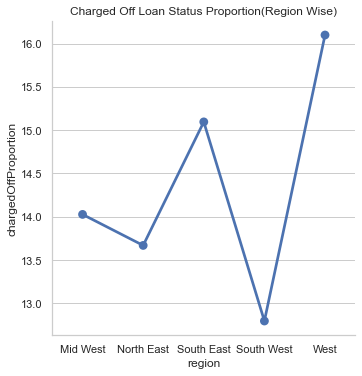

In [135]:
sns.catplot(x='region' , y ='chargedOffProportion',data=regionLoanStatus , kind='point')
plt.title('Charged Off Loan Status Proportion(Region Wise)')
plt.show()

* This Visual tells us that West region is the one which has maximum percentage of Charged off loans.Thus West region is more likely to Default on a Loan than any other region.

In [136]:
stateLoanStatus = loanData.groupby(by=['addr_state','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
stateLoanStatus['Total'] = stateLoanStatus['Charged Off'] + stateLoanStatus['Fully Paid']
stateLoanStatus['chargedOffProportion'] = stateLoanStatus['Charged Off']/stateLoanStatus['Total'] * 100
stateLoanStatus.sort_values('chargedOffProportion',ascending=False).style.set_precision(2).background_gradient('PuBuGn')

loan_status,addr_state,Charged Off,Fully Paid,Total,chargedOffProportion
28,NE,3.00,2.00,5.00,60.00
32,NV,108.00,371.00,479.00,22.55
40,SD,12.00,50.00,62.00,19.35
0,AK,15.00,63.00,78.00,19.23
9,FL,504.00,2277.00,2781.00,18.12
24,MO,114.00,556.00,670.00,17.01
11,HI,28.00,138.00,166.00,16.87
13,ID,1.00,5.00,6.00,16.67
31,NM,30.00,153.00,183.00,16.39
36,OR,71.00,364.00,435.00,16.32


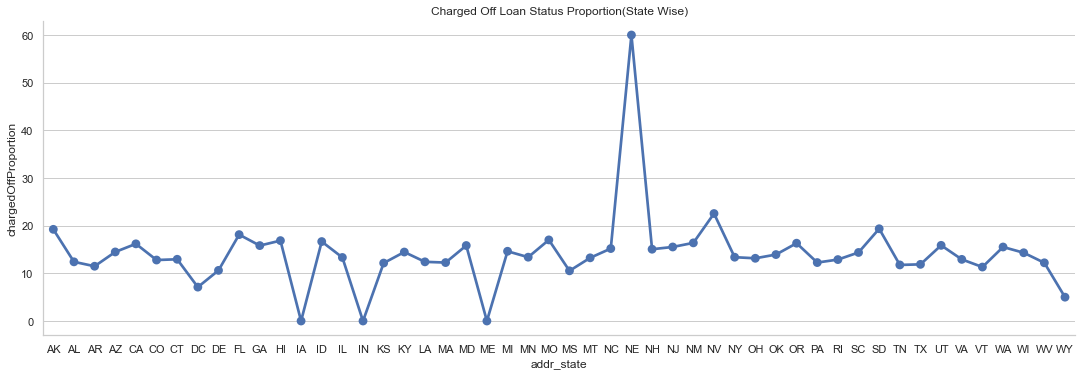

In [137]:
sns.catplot(x='addr_state' , y ='chargedOffProportion',data=stateLoanStatus , kind='point',aspect=3)
plt.title('Charged Off Loan Status Proportion(State Wise)')
plt.show()

* Now this Visual is showing that NE(Nebraska) has the highest Charged Off Proportion but it is because we have very less applicants(only 5) from that state hence we cant conclude.Lets remove NE and try to visualise the other states

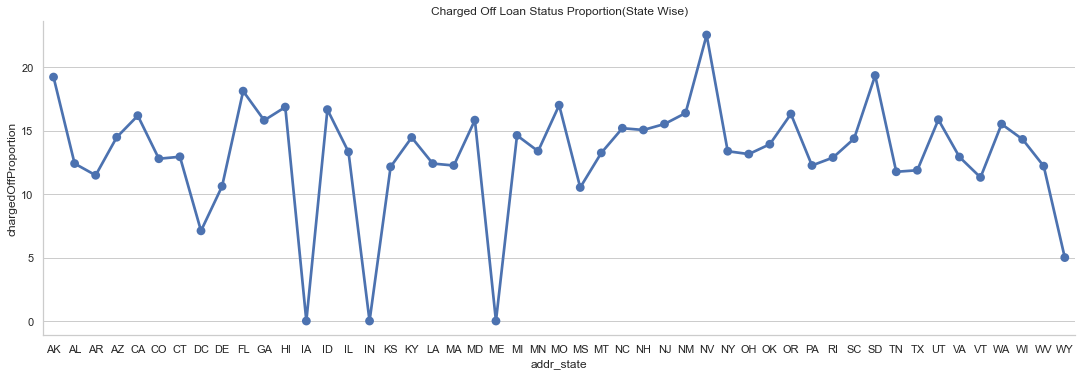

In [138]:
sns.catplot(x='addr_state' , y ='chargedOffProportion',data=stateLoanStatus[stateLoanStatus['addr_state'] != 'NE'] , kind='point',aspect=3)
plt.title('Charged Off Loan Status Proportion(State Wise)')
plt.show()

* NV(Nevada) ,FL(Florida)  and CA(California) are the states which has substantial number of loans given and also the charged off proportion is high which is 22.5, 18.12 and 16.18% respectively.

In [139]:
annualLoanStatus = loanData.groupby(by=['annualIncomeCategory' , 'loan_status']).loan_status.count().unstack().reset_index()
annualLoanStatus['total'] = annualLoanStatus['Charged Off'] + annualLoanStatus['Fully Paid']
annualLoanStatus['chargedOffProportion'] = annualLoanStatus['Charged Off']/annualLoanStatus['total'] * 100
annualLoanStatus.sort_values('chargedOffProportion',ascending=False).style.set_precision(2).background_gradient('PuBuGn')

loan_status,annualIncomeCategory,Charged Off,Fully Paid,total,chargedOffProportion
1,Low,5035,28061,33096,15.21
3,Very High,21,150,171,12.28
2,Medium,532,4379,4911,10.83
0,High,39,360,399,9.77


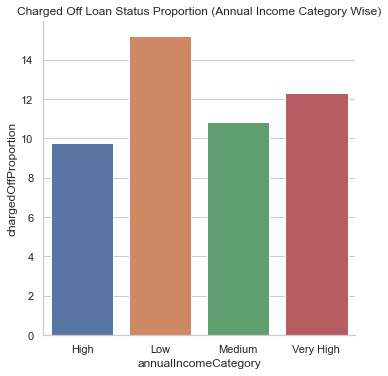

In [140]:
sns.catplot(x='annualIncomeCategory' , y ='chargedOffProportion',data=annualLoanStatus , kind='bar')
plt.title('Charged Off Loan Status Proportion (Annual Income Category Wise)')
plt.show()

* Though Loans approved for low income category is the maximum compared to other income category but lets check this Visual which tells us the charged off proportion of these 4 income categories.Low has the maximum (15.2%) charged off percentage followed by Very High category which is an interesting insight

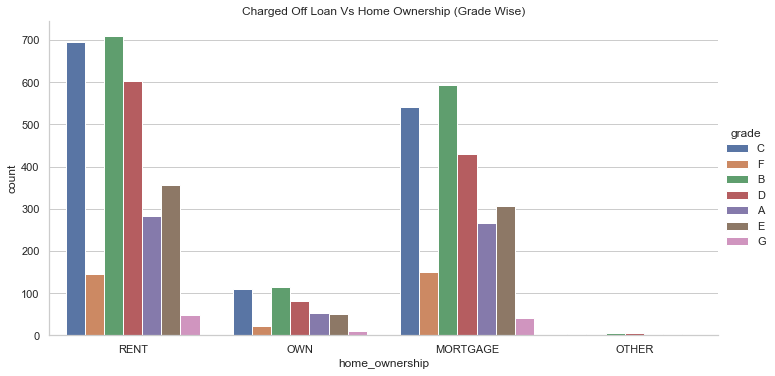

In [141]:
sns.catplot(x='home_ownership',data=loanData[loanData['loan_status']=='Charged Off'] , hue='grade' , kind='count',aspect=2)
plt.title('Charged Off Loan Vs Home Ownership (Grade Wise)')
plt.show()

* This Visual is between Charged off loans and the home onwership status of a borrower.
* We can see that most charged off loans come from Borrowers with Rent and then Mortgage as their Home ownership.
* If a Borrower has Home Ownership as Rent & has a B Grade then they are most likely to default on their loan.
* Within these home ownership category we can see B & C Grade are the ones which Default maximum followed by other Grades.

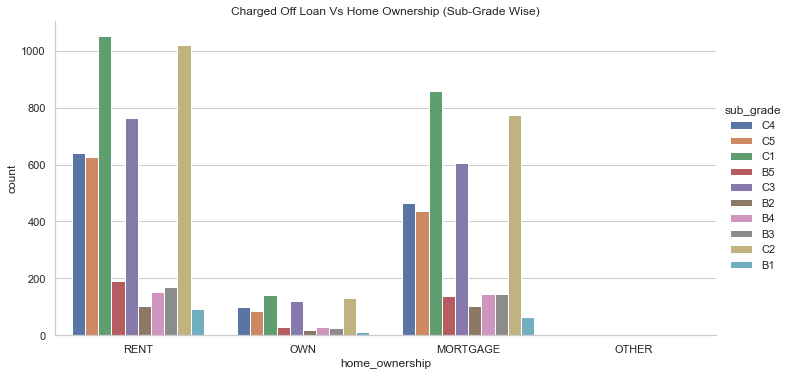

In [142]:
sns.catplot(x='home_ownership',data=loanData.loc[(loanData['loan_status']=='Charged Off') & (loanData['grade'] == 'B') | (loanData['grade'] == 'C')] , hue='sub_grade' , kind='count',aspect=2)
plt.title('Charged Off Loan Vs Home Ownership (Sub-Grade Wise)')
plt.show()

* In this Visual we particularly selected only B and C grade to further look into Sub Grades.
* If a Borrower has home ownership as Rent and falls under Grade C and within it has a sub grade of C1 followed by C2 are more likely to default on a loan.

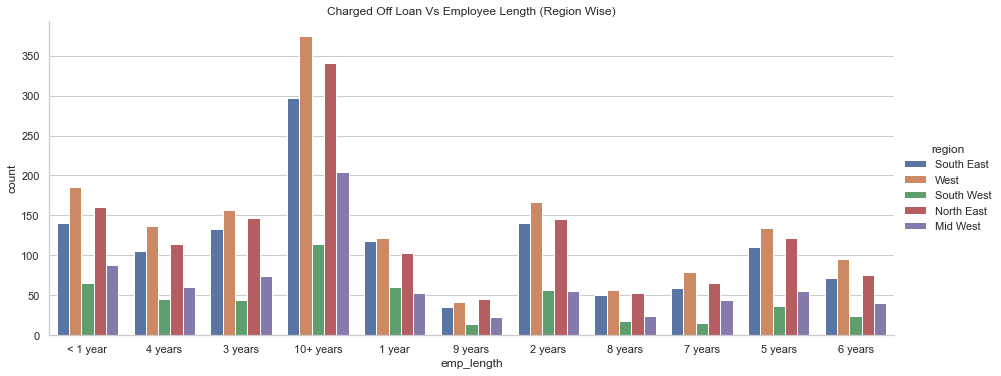

In [143]:
sns.catplot(x='emp_length' , data=loanData[loanData['loan_status']=='Charged Off'] , hue='region' ,kind='count',aspect=2.5)
plt.title('Charged Off Loan Vs Employee Length (Region Wise)')
plt.show()

* As we have seen earlier that most number of loans belonged to employees having an experience of more than 10 years.
* If we look closely we can see almost a same pattern across the categories of employee length.Orange bar(West), Red bar(North East), Blue bar(South East), Purple bar(Mid West) and then Green bar(South West) have almost and same pattern or shape throughout.
* If a Borrower is from West region and has 10 plus years of experience they are more likely to default on a loan.
* Across all employee length 'West' region has more risk involved while giving a loan.

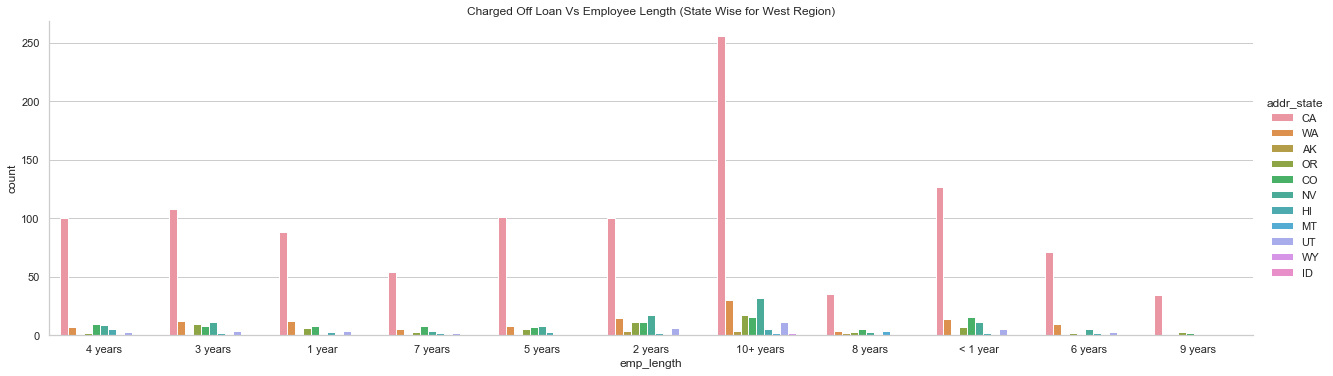

In [144]:
sns.catplot(x='emp_length' , data=loanData[(loanData['loan_status'] == 'Charged Off') & (loanData['region'] == 'West')] ,hue='addr_state',kind='count',aspect=3.5)
plt.title('Charged Off Loan Vs Employee Length (State Wise for West Region)')
plt.show()

* Now we looked further into the West region to check for various states.
* Visual clearly tells us that CA(California) state is the one which has maximum number of defaults, though it is also because the number of loans(Fully Paid & Charged Off) are maximum in CA with a 16.18% of charged off proportion of the state
* If a Borrower is from West region specially from CA with employment length of 10+ years is more likely to Default on a loan.
* CA state has maximum number of Defaults throughout employment length years and has more risk involved while giving a loan.

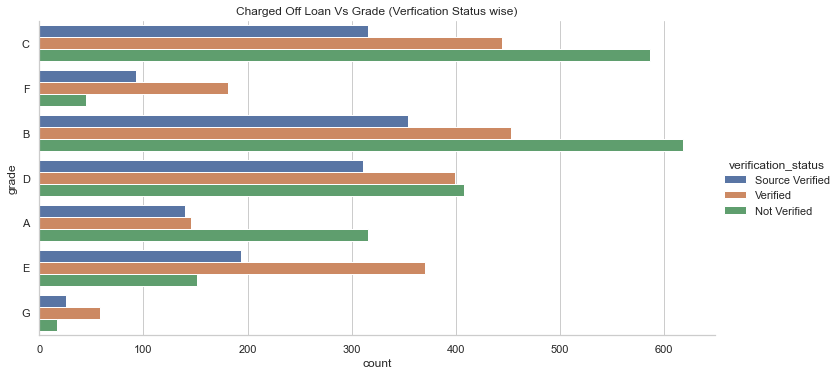

In [145]:
sns.catplot(y= 'grade' , data = loanData[loanData['loan_status']=='Charged Off'] , aspect=2 ,hue='verification_status' ,kind='count' )
plt.title('Charged Off Loan Vs Grade (Verfication Status wise)')
plt.show()

* We have seen in previous few visuals that B & C Grades have been at top for Charged off Loans and if we look at this visual it somewhat tells us that the loans approved and Defaulted are maximum when the verification status is Not Verified.
* Risk of defaulting a loan increases when a Borrower has a grade of B or C and it is not verified before approving the loan.

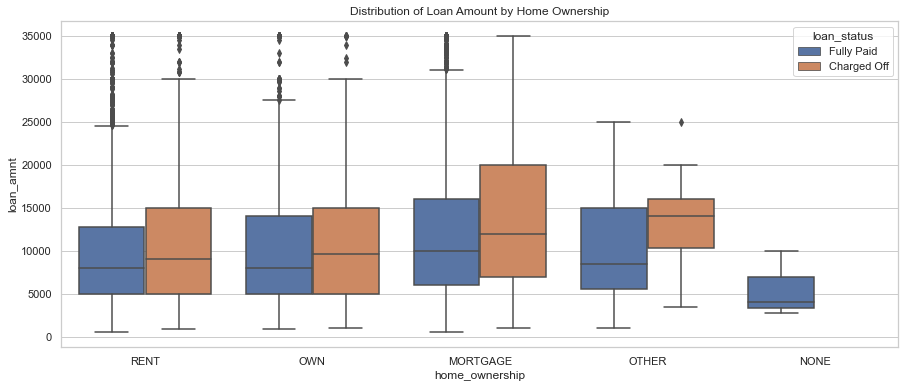

In [146]:
plt.figure(figsize=(15,6))
sns.boxplot(x='home_ownership',y='loan_amnt' , hue='loan_status',data=loanData)
plt.title('Distribution of Loan Amount by Home Ownership')
plt.show()

* Visual gives us an insight of Distribution of the loan amount applied by the Borrowers with respect to their home ownership status.
* As we can see Distribution of loan amount for Mortgage when compared to others categories is more.
* Borrowers with Mortgage have more risk involved 

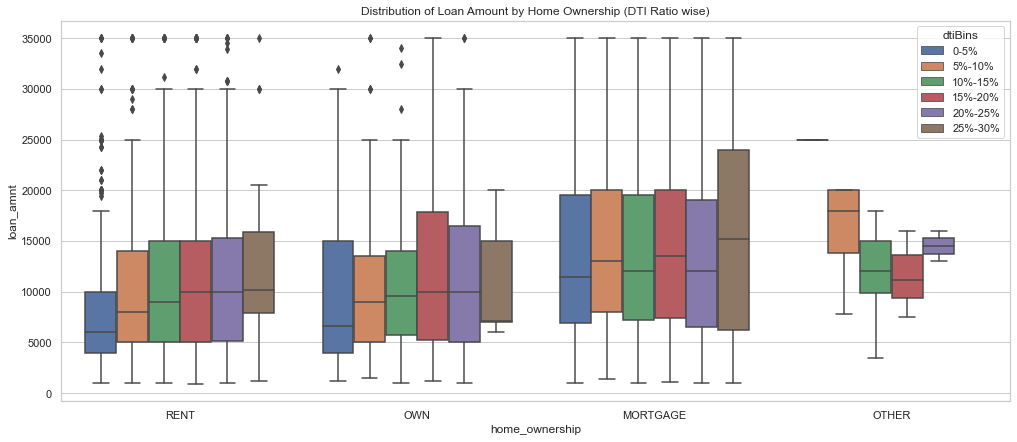

In [147]:
plt.figure(figsize=(17,7))
sns.boxplot(x='home_ownership',y='loan_amnt' , hue='dtiBins',data=loanData[loanData['loan_status']=='Charged Off'])
plt.title('Distribution of Loan Amount by Home Ownership (DTI Ratio wise)')
plt.show()

* Now once we got to know that Mortgage from Home Ownership has bigger distribution of  charged off loans we went further inside to check DTI Ratio's of these Borrowers. As we can see that Borrowers with Home ownership status as Mortgage and DTI Ratio falling between 25%-30% have a greater risk involved for a loan.

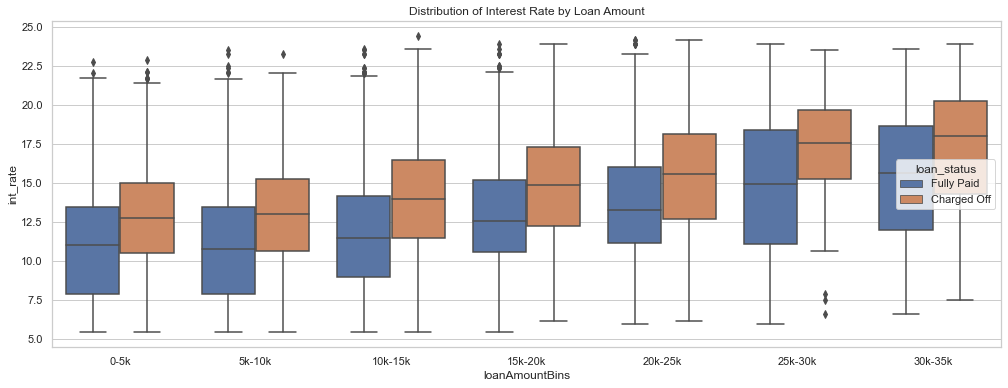

In [148]:
plt.figure(figsize=(17,6))
sns.boxplot(y='int_rate',x='loanAmountBins',data=loanData,hue='loan_status')
plt.title('Distribution of Interest Rate by Loan Amount')
plt.show()

* This Visual gives us an insight of how the interest rate of Charged Off loans is greater than Fully Paid loans across all the loan amount categories which can be a strong factor for defaulted loans
* Now we wanted to check interest rates specifically for charged off loans and wanted to see if it is getting affected by the Grade score of the Borrowers or not.

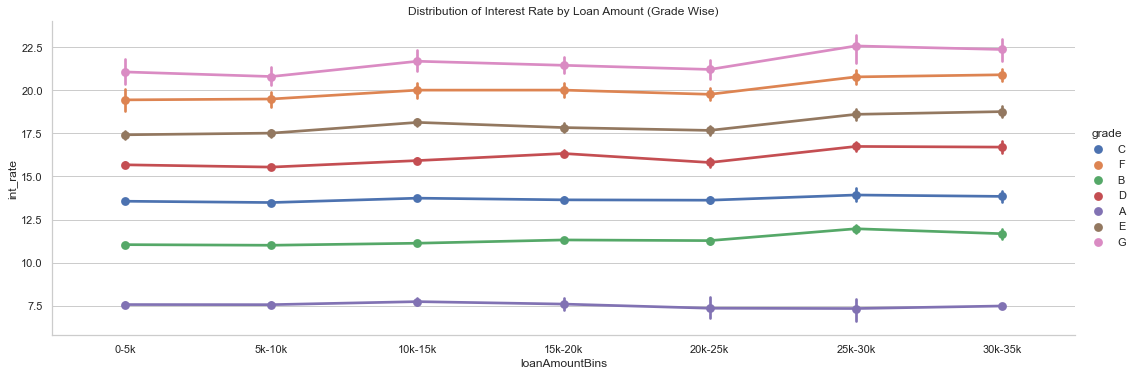

In [149]:
sns.catplot(y='int_rate',x='loanAmountBins',data=loanData[loanData['loan_status']=='Charged Off'],hue='grade',kind='point',aspect=3)
plt.title('Distribution of Interest Rate by Loan Amount (Grade Wise)')
plt.show()

* This Visual gives us an insight about interest rate on a particular loan increases for Brrowers having Grade from A to G.
* Borrowers having a Grade G are more likely to default on a loan when compared to other Grades because the interest rate on the loan they get is higher than 20% as it involves a lot of risk and tend to default.

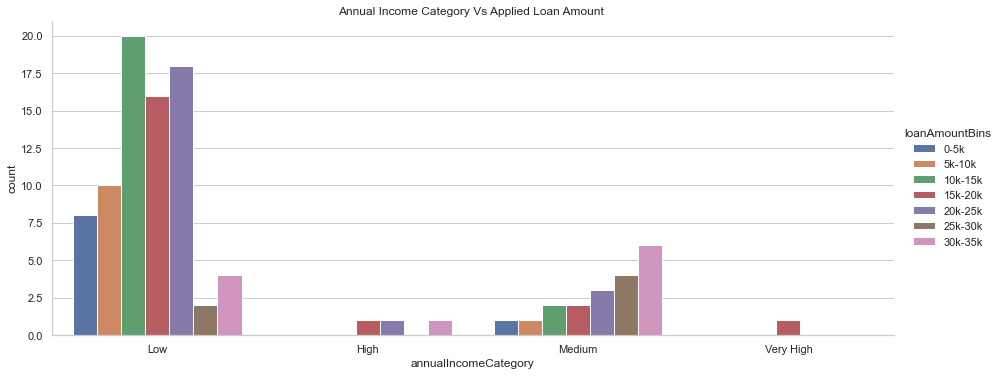

In [150]:
sns.catplot(x='annualIncomeCategory',data=loanData[(loanData['loan_status']=='Charged Off') & (loanData['grade']=='G')],hue='loanAmountBins',kind='count',aspect=2.5)
plt.title('Annual Income Category Vs Applied Loan Amount ')
plt.show()

* This Visual is between Annual income category and the loan amount applied by the borrower.
* So we know that charged off loans have a greater interest rate through out and it is higher when a Borrower has a G Grade score. This Visual also gives us an insight that if a Borrower in G Grade has low income and applies for a loan amount of greater than 10k till 25k it has a greater risk involved.

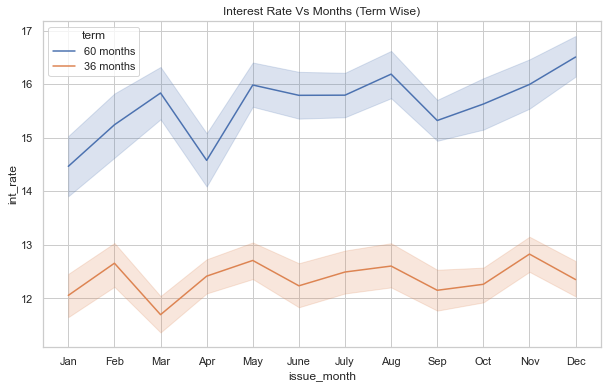

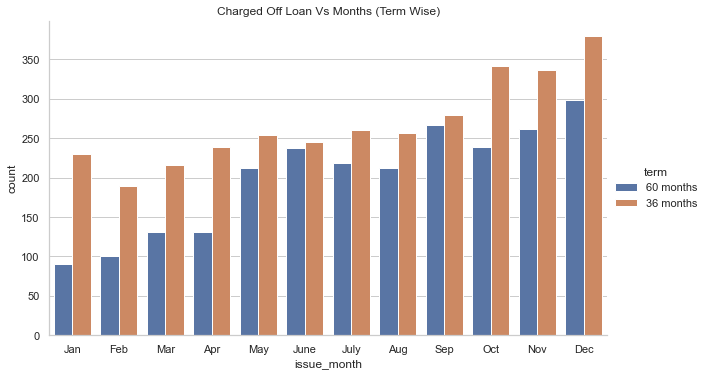

In [151]:
plt.figure(figsize=(10,6))
sns.lineplot(x='issue_month' , data = loanData[loanData['loan_status']=='Charged Off'], y='int_rate' , hue = 'term')
plt.title('Interest Rate Vs Months (Term Wise)')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12] , ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
sns.catplot(x='issue_month' , data = loanData[loanData['loan_status']=='Charged Off'] , hue = 'term',kind='count',aspect=1.7)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11] , ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.title('Charged Off Loan Vs Months (Term Wise)')
plt.show()

* 1st Visual gives us an insight on the interest rate with of the term of a loan, month wise and as we can see lower the duration of the term lower is the interest on the loan. For 36 months its more or less similar throughout a year but a slight increase in interest rate for 60 months.

* 2nd Visual gives us an interesting insight that loans having a term of 36 months are getting charged off more than the loans having a term of 60 months even when the interest rate and duration is less.

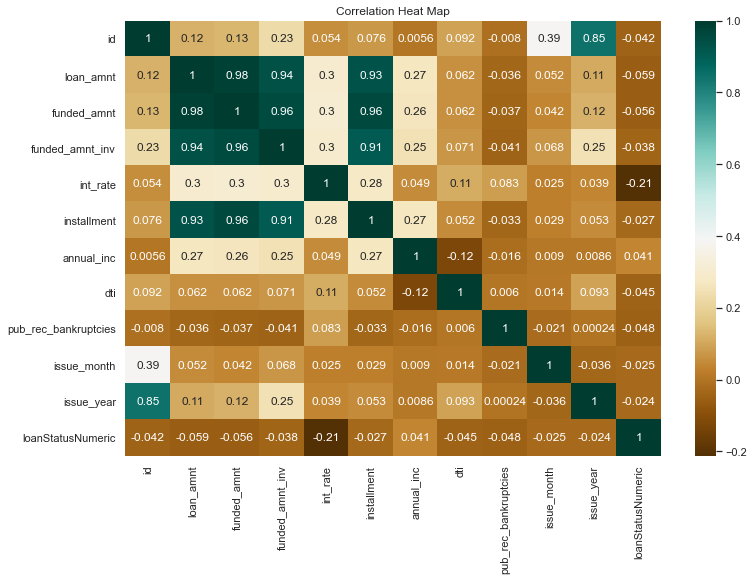

In [152]:
loanData['loanStatusNumeric'] = loanData['loan_status'].map({'Fully Paid':1 , 'Charged Off':0})
plt.figure(figsize=(12,8))
sns.heatmap(loanData.corr() , annot=True , cmap="BrBG")
plt.title('Correlation Heat Map')
plt.show()

* Loan Status is 1 - Fully Paid & 0 - Charged Off 
* Heat Map gives us an insight on how numerical features of this dataset are corelated to each other where correlation ranges from negative(-1) to positive(+1) correlation 
* If we will focus on loanStatusNumeric which is a column of (0's and 1's) we can see its negative correlation with most of the other variables.
* Strongest negative correlation of loanStatusnumeric is with int_rate.
* Darker the color more strong is the correlation between the variables.
* We can see strong positive correlation between Loan Amount and the installment for it (0.93), DTI has a negative correlation with annual income (-0.12). Which means when Annual income increases the DTI ratio linked to it decreases which we have already discussed. If DTI Ratio is more, mostly the annual income will be less and more chances of risk is involved.

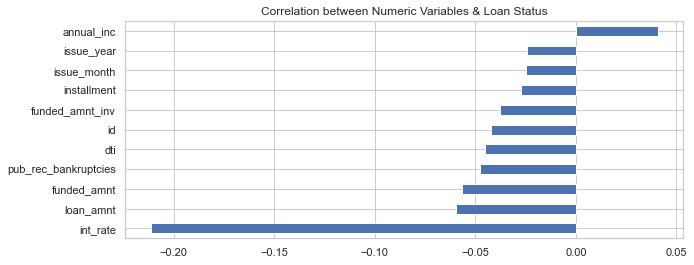

In [153]:
plt.figure(figsize=(10,4))
loanData.corr()['loanStatusNumeric'].drop('loanStatusNumeric').sort_values().plot.barh()
plt.title('Correlation between Numeric Variables & Loan Status')
plt.show()

* This is a correlation visual between Loan Status and the numeric features of this dataset.
* Most of the features are negatively correlated with loan status and the strongest negative correlation of loanStatusNumeric is with int_rate which means when interest rate increases for a loan, it has more risk involved and is more likely to default.
* Annual Income has a positive correlation with loan status, not strong enough but still positive.

In [110]:
loanCountDetails = loanData.groupby(['annualIncomeCategory', 'purpose'])['loan_status'].value_counts()
loanCountDetailsDf = pd.DataFrame(loanCountDetails)
loanCountDetailsDf = loanCountDetailsDf.rename(columns = {'loan_status':'loan_count'})
loanCountDetailsDf = loanCountDetailsDf.reset_index()

fullyPaid = loanCountDetailsDf[loanCountDetailsDf['loan_status'] == 'Fully Paid'].sort_values(by= 'annualIncomeCategory',ascending=True)
chargedOff = loanCountDetailsDf[loanCountDetailsDf['loan_status'] == 'Charged Off'].sort_values(by= 'annualIncomeCategory',ascending=True)

loanDetails= loanData.groupby(['annualIncomeCategory', 'purpose'])['int_rate' , 'loan_amnt'].mean()
loanDetails = pd.DataFrame(loanDetails).reset_index()
loanDetails = loanDetails.sort_values(by= 'annualIncomeCategory',ascending=True)

finalLoanDetails = loanCountDetailsDf.merge(loanDetails , on=['annualIncomeCategory','purpose'] , how='outer')

loanStatusMerge = fullyPaid.merge(chargedOff , on=['annualIncomeCategory','purpose'] ,how='outer')
loanStatusMerge = loanStatusMerge.fillna(0)
loanStatusMerge = loanStatusMerge.rename(columns = {'loan_count_x':'fully_paid_loan_count' , 'loan_count_y':'charged_off_loan_count' })
loanStatusMerge = loanStatusMerge.drop(columns=['loan_status_x','loan_status_y'])

finalLoanDetails = finalLoanDetails.merge(loanStatusMerge , on=['annualIncomeCategory','purpose'] , how = 'outer')
finalLoanDetails = finalLoanDetails.fillna(0)
finalLoanDetails['total_loan_count'] = finalLoanDetails['fully_paid_loan_count'] +finalLoanDetails['charged_off_loan_count']
finalLoanDetails['Default/Total_loan (%)'] = (finalLoanDetails['charged_off_loan_count']/finalLoanDetails['total_loan_count'])*100
finalLoanDetails = finalLoanDetails.drop(columns = ['loan_count','loan_status'])
finalLoanDetails = finalLoanDetails.sort_values(by= 'annualIncomeCategory',ascending=True)
finalLoanDetails = finalLoanDetails.drop_duplicates()
finalLoanDetails = finalLoanDetails.fillna(0)
finalLoanDetails.style.set_precision(2).background_gradient('PuBuGn')

,annualIncomeCategory,purpose,int_rate,loan_amnt,fully_paid_loan_count,charged_off_loan_count,total_loan_count,Default/Total_loan (%)
0,High,car,9.43,12558.33,12.00,0.00,12.00,0.00
19,High,wedding,12.18,16450.00,7.00,0.00,7.00,0.00
18,High,small_business,13.21,23181.25,29.00,3.00,32.00,9.38
15,High,other,13.71,14576.88,33.00,7.00,40.00,17.50
13,High,moving,11.62,17900.00,3.00,1.00,4.00,25.00
11,High,medical,11.60,14314.58,12.00,0.00,12.00,0.00
10,High,major_purchase,13.50,16883.70,23.00,0.00,23.00,0.00
16,High,renewable_energy,21.64,25000.00,0.00,1.00,1.00,100.00
8,High,house,13.41,27625.00,7.00,1.00,8.00,12.50
7,High,home_improvement,12.28,19990.94,64.00,5.00,69.00,7.25


* Looking at the table above it consists of details of Annual Income category, what was the purpose of the loan,what was the average interest rate for that loan and the average loan amount, total loan counts (with fully paid and charged off) which comes under that particular category of annual income and purpose and the default ratio of that particular category.

In [155]:
finalLoanDetails.sort_values(by='Default/Total_loan (%)',ascending=False).head().style.set_precision(2).background_gradient('PuBuGn')

,annualIncomeCategory,purpose,int_rate,loan_amnt,fully_paid_loan_count,charged_off_loan_count,total_loan_count,Default/Total_loan (%)
16,High,renewable_energy,21.64,25000.00,0.00,1.00,1.00,100.00
5,High,educational,14.96,12000.00,0.00,1.00,1.00,100.00
94,Very High,wedding,13.74,15666.67,4.00,2.00,6.00,33.33
42,Low,small_business,12.78,12149.91,1023.00,416.00,1439.00,28.91
13,High,moving,11.62,17900.00,3.00,1.00,4.00,25.00


* We sorted the values with respect to Default Ratio. If we look at the Default Ratio and ignore the ones which has little to no data at all. We can say that Borrowers applying for a loan for the purpose of small business with an income falling in Low category are more likely to default(28.91%) on a loan and more risk is involved.

In [156]:
finalLoanDetails.sort_values(by=['int_rate','Default/Total_loan (%)'],ascending=[False,False]).head(15).style.set_precision(2).background_gradient('PuBuGn')

,annualIncomeCategory,purpose,int_rate,loan_amnt,fully_paid_loan_count,charged_off_loan_count,total_loan_count,Default/Total_loan (%)
16,High,renewable_energy,21.64,25000.00,0.00,1.00,1.00,100.00
88,Very High,moving,18.08,15125.00,3.00,1.00,4.00,25.00
91,Very High,renewable_energy,15.78,15000.00,2.00,0.00,2.00,0.00
5,High,educational,14.96,12000.00,0.00,1.00,1.00,100.00
4,High,debt_consolidation,14.47,21599.65,130.00,14.00,144.00,9.72
90,Very High,other,14.20,14864.29,11.00,3.00,14.00,21.43
94,Very High,wedding,13.74,15666.67,4.00,2.00,6.00,33.33
15,High,other,13.71,14576.88,33.00,7.00,40.00,17.50
93,Very High,small_business,13.62,19410.42,10.00,2.00,12.00,16.67
78,Very High,debt_consolidation,13.59,18488.71,57.00,5.00,62.00,8.06


* We have sorted the values with respect to Interest rate and Default Ratio. If we look closely most of the categories have very less data to analyze and conclude but looking at the data we can say that Borrowers with purpose as small business with Default Ratio 19.93% and interest rate 13.42% & Medium annual income or debt consolidation with Default Ratio 9.72% and interest rate 14.47% with High annual income are more likely to default.

In [157]:
finalLoanDetails.sort_values(by=['Default/Total_loan (%)','int_rate'],ascending=[False,True]).head(15).style.set_precision(2).background_gradient('PuBuGn')

,annualIncomeCategory,purpose,int_rate,loan_amnt,fully_paid_loan_count,charged_off_loan_count,total_loan_count,Default/Total_loan (%)
5,High,educational,14.96,12000.00,0.00,1.00,1.00,100.00
16,High,renewable_energy,21.64,25000.00,0.00,1.00,1.00,100.00
94,Very High,wedding,13.74,15666.67,4.00,2.00,6.00,33.33
42,Low,small_business,12.78,12149.91,1023.00,416.00,1439.00,28.91
13,High,moving,11.62,17900.00,3.00,1.00,4.00,25.00
88,Very High,moving,18.08,15125.00,3.00,1.00,4.00,25.00
58,Medium,house,12.91,17216.67,40.00,11.00,51.00,21.57
90,Very High,other,14.20,14864.29,11.00,3.00,14.00,21.43
40,Low,renewable_energy,11.18,7309.94,66.00,17.00,83.00,20.48
85,Very High,major_purchase,11.14,11090.00,8.00,2.00,10.00,20.00


* We have sorted with respect to Default Ratio and wanted interest rate to start from ascending order whic works category wise. Now as we have already discussed about small business, we also noticed and even when the interest rate is low ranging from (11-15%) borrowers applying for a  medical with low income category(Default ratio - 16.67%) or educational loan with low & high income category(Default ratio - 17.24% and for high only 1 applicant which defaulted) also have an high Default Ratio and there is risk involved.

#### Recommendations
* Have to be extra careful when approving a loan for a purpose of small business specially when income is in Low or Medium Category, need to be careful if the purpose is debt consolidation as well.
* Observed that Medical & Educational loan’s were bit risky as well when income was in low or medium category and even when the interest rate was low(10-15%) and hence need extra attention while approval.
* West region had most percentage of charged off loans and  its important to cross check all the details properly. Specially when the applicant has 10 plus years of experience and from CA(California).
* Loan approval of an applicant from California(CA), Florida(FL) or Nevada(NV) state are most likely to default and hence need to be careful and check all the details 
* Grades G & F (G2,G3,F4 & F5) are strong indicators of defaulting a loan.
* Home Ownership as Rent or Mortgage needs special attention. Specially if Grade is C(C1 & C2) or B. Also observed that majorly the loans approved for Grade B & C were not verified and more likely to become a bad loan hence need to verify before any loan approval. 
* Need to be extra careful when DTI Ratio of an applicant is above 25%.
* Applicant from Low Income Category with Grade G is also a bad combination specially when the loan amount applied ranges between 10k-25k.